<a href="https://colab.research.google.com/github/sandheepgopinath/Computer-Vision/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [3]:
import tensorflow
import os
import cv2
import matplotlib.pyplot as plt

tensorflow.__version__

'2.2.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/Computer Vision/"

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile

with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


Using the OS.walk functionality to create a foledr structure for easy access

In [0]:
path='./PINS'
structure=next(os.walk(path))

In [26]:
print(path+'/'+structure[1][0])

./PINS/pins_david mazouz


In [0]:
structure1=next(os.walk(path+'/'+structure[1][0]))

In [0]:
img=cv2.imread(path+'/'+structure[1][0]+'/'+structure1[2][0])

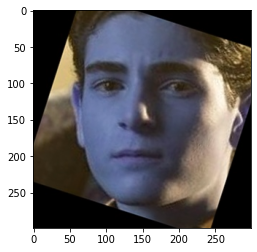

In [29]:
plt.imshow(img/255)

In [30]:
path+'/'+structure[1][10]+'/'+structure1[2][0]

'./PINS/pins_millie bobby brown/david mazouz79.jpg'

In [0]:
import numpy as np
import os
## Class Definition

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

        
## Function Definition  

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

Method 1 using metadata

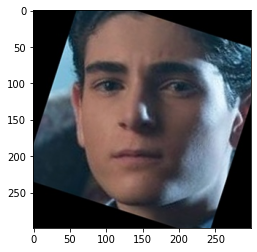

In [0]:
im=load_image('./'+str(metadata[0]))
plt.imshow(im)

Method 2 using metadata and by using class functions

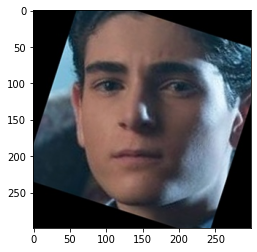

In [122]:
im=load_image(metadata[0].image_path())
plt.imshow(im)

Method 3 using os functions


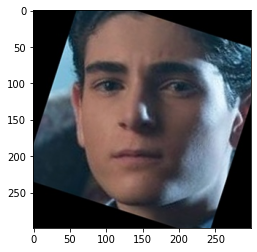

In [0]:
structure1=next(os.walk(path+'/'+structure[1][0]))
plt.imshow(load_image(path+'/'+structure[1][0]+'/'+structure1[2][0]))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights("/content/drive/My Drive/Colab Notebooks/Computer Vision/vgg_face_weights.h5")

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


The Embedding vector has a dimension of 2622

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings = np.zeros((metadata.shape[0], 2622))
import time
start_time = time.time()
for i, path in enumerate(metadata):
  img_path = path.image_path()
  img = load_image(img_path)
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224, 224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

embeddings[0]

Done in 580.591s


array([ 0.01553643, -0.00645021,  0.00222701, ..., -0.02165805,
       -0.00118076,  0.01691329])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

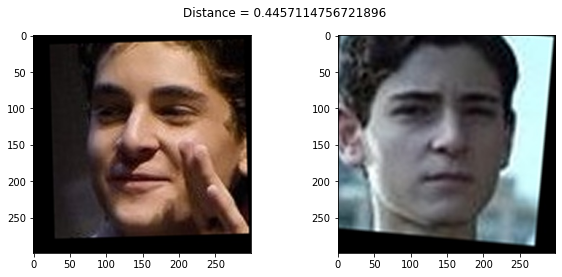

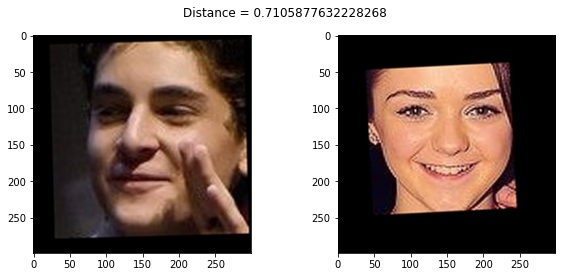

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(10,4))
    plt.suptitle('Distance = {}'.format(distance(embeddings[idx1], embeddings[idx2])))
    plt.subplot(1,2,1)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(1,2,2)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels




In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [0]:
print(X_train.shape)
print(X_test.shape)

(9573, 2622)
(1197, 2622)


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

labels=np.array([label.name for label in metadata])

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(targets) 

y_train = y[train_idx]
y_test  = y[test_idx]

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### Reduce dimensions using PCA (5 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2622)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Understanding the variance explained by the parameters

In [124]:
print(pca.explained_variance_)

[4.64503790e-02 1.43704344e-02 1.21546325e-02 ... 2.11796545e-11
 2.07579997e-11 2.03545794e-11]


Percentage of variance explained by each component

In [1]:
print(pca.explained_variance_ratio_)

NameError: ignored

In [127]:
len(pca.explained_variance_ratio_)

2622

Plotting a graph with only the first 250 variables, as beyond 250, the explained variane becomes very less

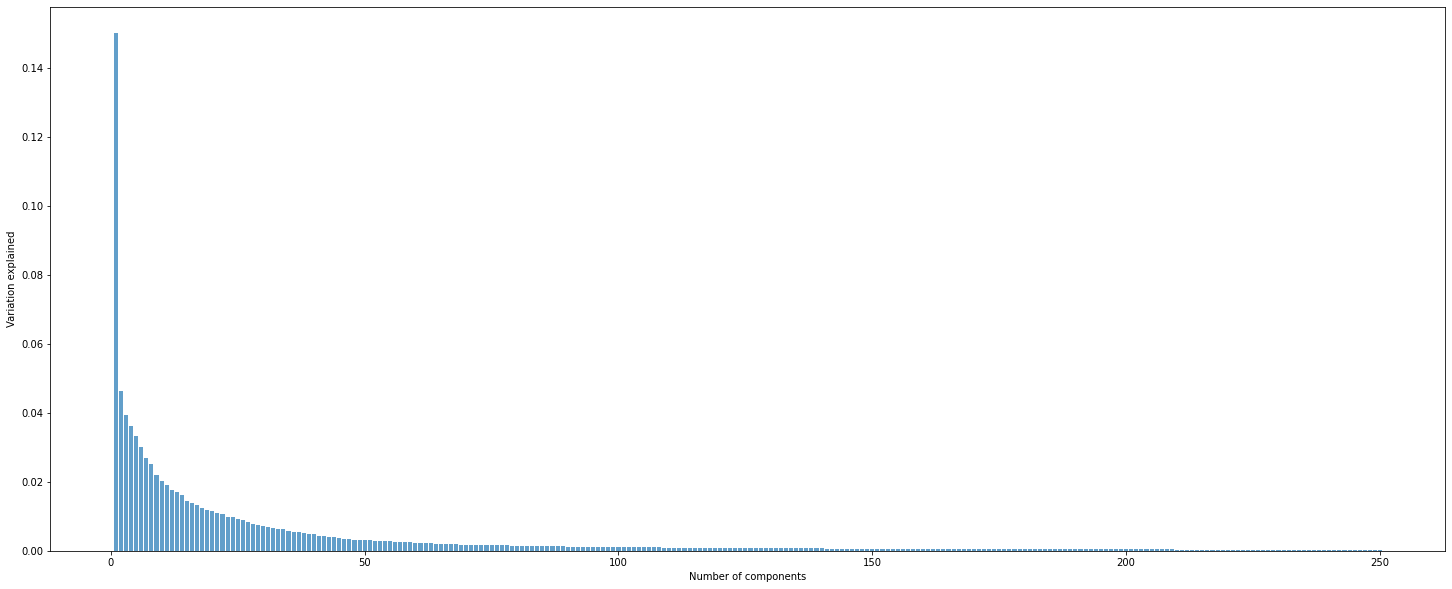

In [146]:
fig1 = plt.figure(figsize=(25,10))
plt.bar(list(range(1,(251))),pca.explained_variance_ratio_[0:250],alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Number of components')
plt.show()

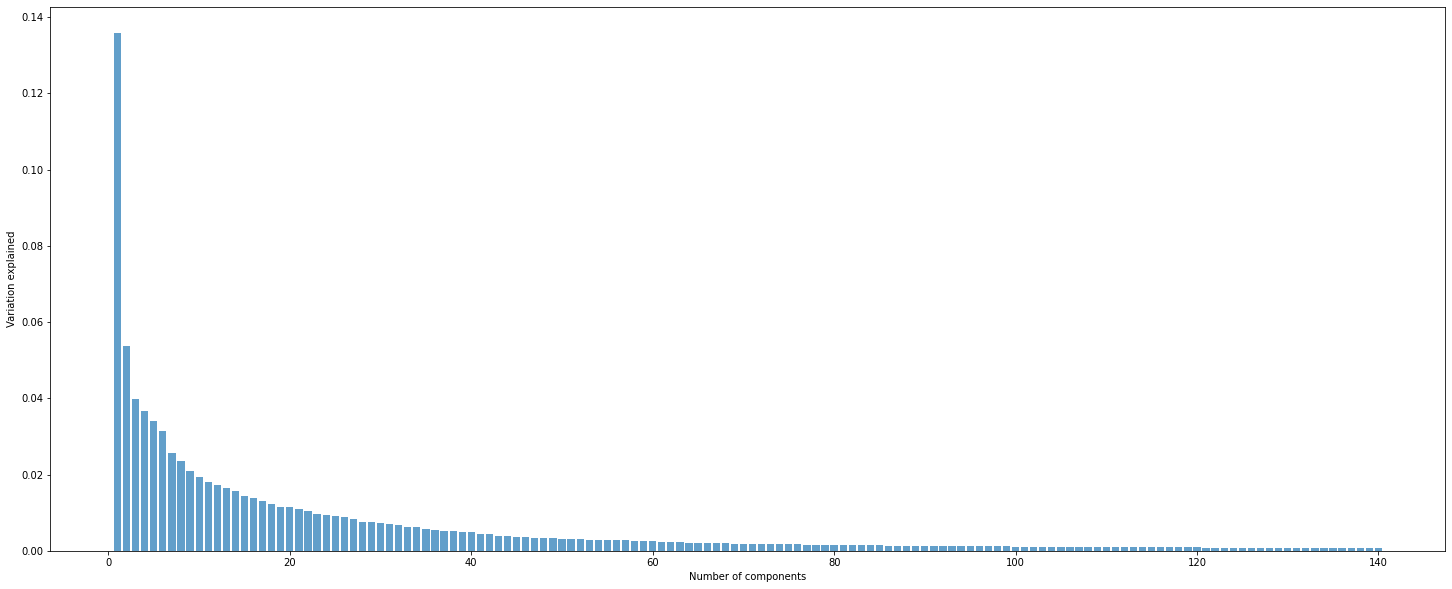

In [215]:
pca_component = PCA(n_components=140)
pca_component.fit(X_train_scaled)

fig1 = plt.figure(figsize=(25,10))
plt.bar(list(range(1,(141))),pca_component.explained_variance_ratio_[0:140],alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Number of components')
plt.show()

pca_X_train = pca_component.transform(X_train_scaled)
pca_X_test = pca_component.transform(X_test_scaled)

### Build a Classifier (5 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [151]:
from sklearn.svm import SVC

pca_svm = SVC(C = 1, kernel = 'rbf', degree=3)
pca_svm.fit(pca_X_train, y_train)
pca_svm.score(pca_X_test, y_test)

0.9598997493734336

### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Text(0.5, 1.0, 'David Mazouz')

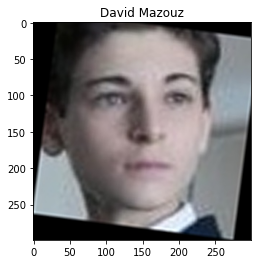

In [194]:
pos=10


im = load_image(metadata[test_idx][pos].image_path())
im_predict =pca_svm.predict([pca_X_test[pos]])
label = label_encoder.inverse_transform(im_predict)[0]
label=label.replace('pins_','')
label=label.title()

plt.imshow(im)
plt.title(label)

### Repeating the preprocessing steps to test on an out of sample image of David Mazouz

https://healthyton.com/wp-content/uploads/2019/06/David-Mazouz.jpg

In [0]:
i=cv2.imread("/content/drive/My Drive/Colab Notebooks/Computer Vision/David-Mazouz.jpg")

In [225]:

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img1 = (i / 255.).astype(np.float32)

img1 = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector1 = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector1.shape)

(224, 224, 3)
(2622,)


In [0]:
ev=scaler.transform(embedding_vector1.reshape(1,-1))

In [0]:
im=pca_component.transform(ev)

Text(0.5, 1.0, 'David Mazouz')

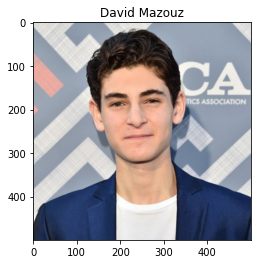

In [229]:
pos=10


im =im
im_predict =pca_svm.predict([pca_X_test[pos]])
label = label_encoder.inverse_transform(im_predict)[0]
label=label.replace('pins_','')
label=label.title()

RGB_img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(label)